In [39]:
%matplotlib inline
%run init.py

Loading places/bristol25
Loading Telford and Wrekin
Loading Caerphilly
Loading City of Edinburgh
Loading York
Loading Renfrewshire
Loading Medway
Loading Bridgend
Loading Redcar and Cleveland
Loading City of Bristol
Loading Swindon
Loading Newport
Loading Yell
Loading Stockton-on-Tees
Loading North East Lincolnshire
Loading Windsor and Maidenhead
Loading Darlington
Loading Aberdeen City
Loading Thurrock
Loading West Dunbartonshire
Loading Warrington
Loading Wokingham
Loading Lewes
Loading North Warwickshire
Loading Rotherham
Loading Warwick District
Loading North West Leicestershire
Loading Charnwood
Loading North East Derbyshire
Loading Guildford
Loading Birmingham
Loading Amber Valley
Loading Rochford
Loading Mole Valley
Loading Wirral District
Loading Tandridge
Loading Tonbridge and Malling
Loading Kettering
Loading Arun
Loading Bromsgrove
Loading Hart
Loading Dacorum
Loading Newcastle-under-Lyme
Loading Sefton
Loading Chorley
Loading Chiltern
Loading Wyre Forest
Loading Wigan
Loadi

In [40]:
city = 'City of Bristol'

In [41]:
np.histogram2d

<function numpy.lib.twodim_base.histogram2d>

In [42]:
def plot_flow_time(xlab,ylab,fname,xnorm='',ynorm=''):
    # Looking at a single city here
    Q = loadCity('Q',city)
    T = loadCity('T',city)
    
    all_x=[]
    all_y=[]
    
    for d,di in zip(X[city],Xi[city]):
        try:
            x = range(len(Q[d]))
            y = Q[d]

            if xnorm:
                x = x/np.array(float(R[xnorm][di]))
      
            if ynorm:
                y = y/np.array(float(R[ynorm][di]))                             
                               
            # Flow vs time
            plt.figure(0)
            plt.plot(x,y,label=di)
            
            # Flow vs time
            plt.figure(1)
            plt.plot(x,y,label=di,zorder=-32,alpha=0.2,linewidth=0.2)
            all_x.extend(x)
            all_y.extend(y)        
            
            # Cumulative flow vs time 
            plt.figure(2)
            plt.plot(x,np.cumsum(y),label=di)        
    
        except ZeroDivisionError:
            pass    
    
    plt.figure(0)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.savefig('../PhD/Papers/2014.12.untitled/figs/{0}.pdf'.format(fname))
    
    plt.figure(1)
    #***
    H,xedges,yedges=np.histogram2d(all_x,all_y,bins=25)
    digitized = np.digitize(all_x, xedges)
    x_mean = [np.array(all_x)[digitized == i].mean() for i in range(1, len(xedges))]
    y_mean = [np.array(all_y)[digitized == i].mean() for i in range(1, len(xedges))]
    x_std = [np.array(all_x)[digitized == i].std() for i in range(1, len(xedges))]
    y_std = [np.array(all_y)[digitized == i].std() for i in range(1, len(xedges))]
    plt.errorbar(x_mean,y_mean,y_std,linewidth=1.0)    
    #***    
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.savefig('../PhD/Papers/2014.12.untitled/figs/errorbar-{0}.pdf'.format(fname))
    
    plt.figure(2)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.savefig('../PhD/Papers/2014.12.untitled/figs/cumsum-{0}.pdf'.format(fname))

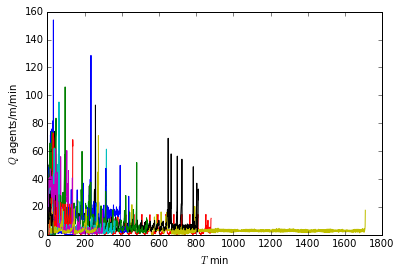

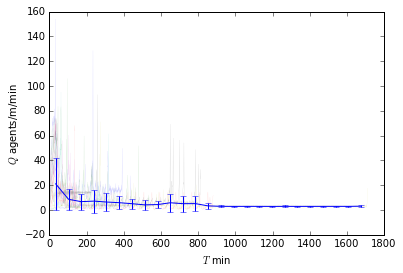

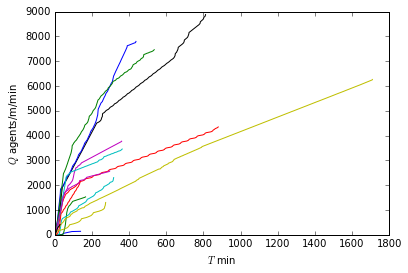

In [43]:
xlab = '$T$ min'
ylab = '$Q$ agents/m/min'
fname = 'T-Q'
plot_flow_time(xlab=xlab,ylab=ylab,fname=fname)

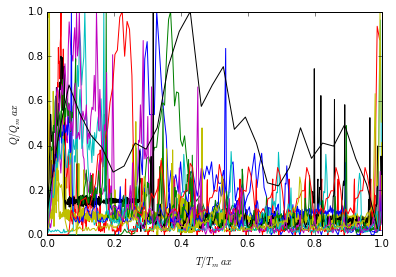

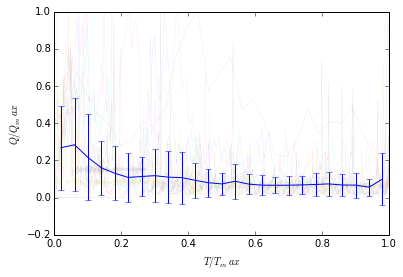

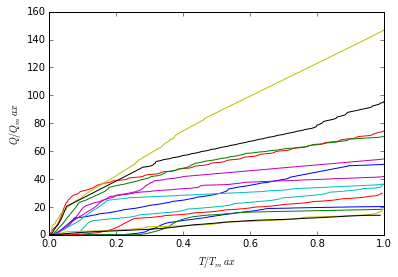

In [44]:
xlab = '$T/T_max$'
ylab = '$Q/Q_max$'
fname = 'T:Tmax-Q:Qmax'
xnorm = 'Tmax'
ynorm = 'Qmax'
plot_flow_time(xlab=xlab,ylab=ylab,fname=fname,xnorm=xnorm,ynorm=ynorm)

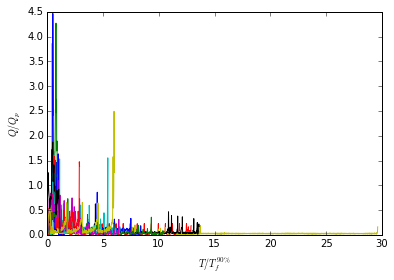

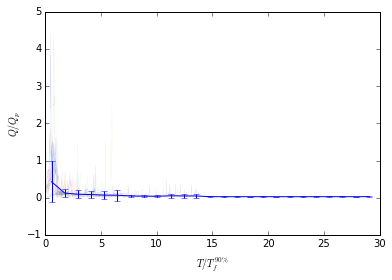

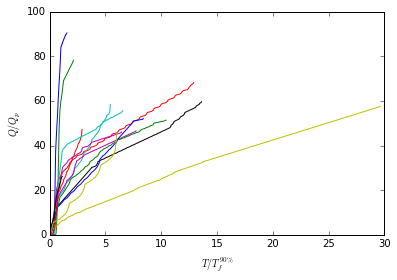

In [45]:
xlab = '$T/T_f^{90\%}$'
ylab = '$Q/Q_p$'
fname = 'T:T90f-Q:Qp'
xnorm = 'T90f'
ynorm = 'Qp'
plot_flow_time(xlab=xlab,ylab=ylab,fname=fname,xnorm=xnorm,ynorm=ynorm)

In [46]:
city = 'City of Bristol'

def plot_hist(l):
    data=loadCity(l,city)              
    for x,xi in zip(X[city],Xi[city]):
        try:
            # Unnormalised
            v=data[x]
            md = max(data[x])
            label='std=%0.2f mu=%0.2f x=%i xi=%i'%(np.std(v),np.mean(v),x,xi)
            plt.figure()
            plt.hist(v,bins=20,label=label)
            plt.legend()
            plt.xlabel('${0}$'.format(l))
            plt.ylabel('$N$')            
            
            # Normalised
            v=[ve/md for ve in v]
            label='std=%0.2f mu=%0.2f x=%i xi=%i'%(np.std(v),np.mean(v),x,xi)        
            plt.figure()
            plt.hist(v,bins=20,color='r',label=label)
            plt.xlabel('${0}/{0}_{{max}}$'.format(l))
            plt.ylabel('$N$')            
            plt.legend()
        except KeyError:
            pass

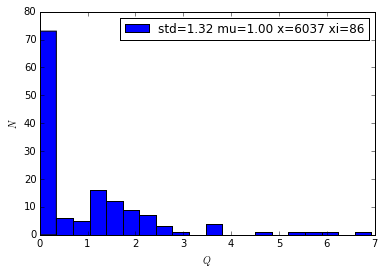

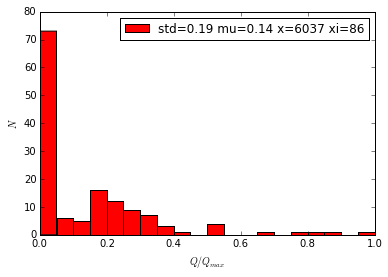

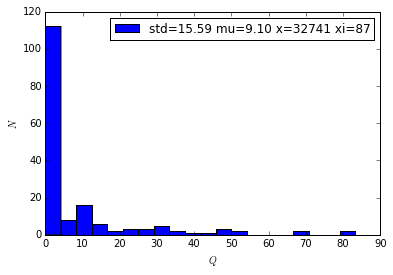

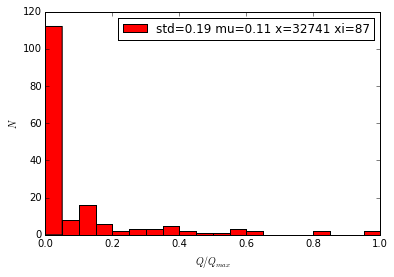

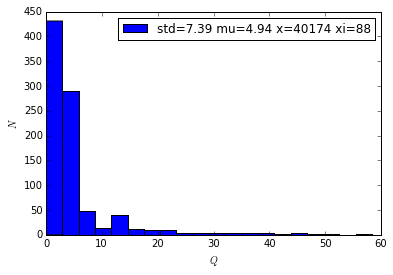

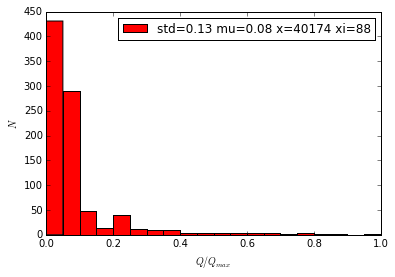

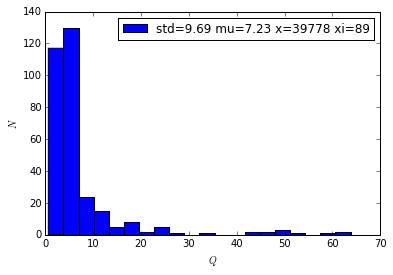

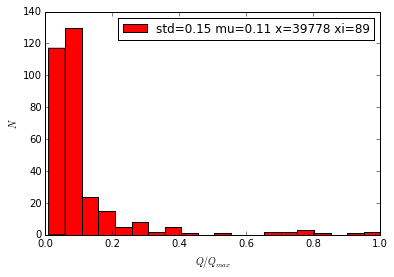

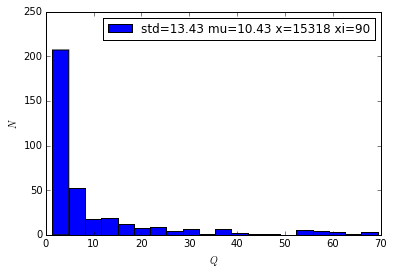

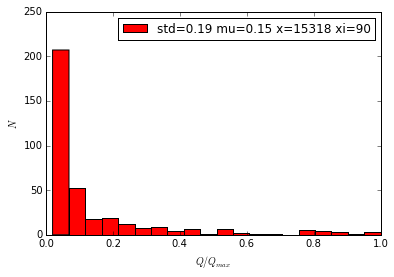

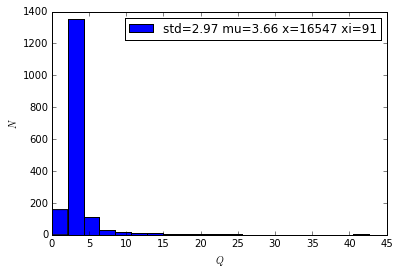

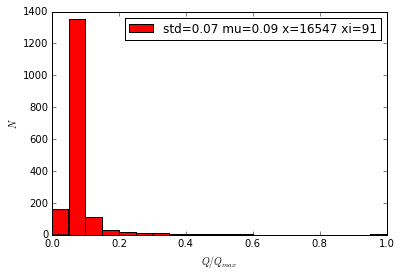

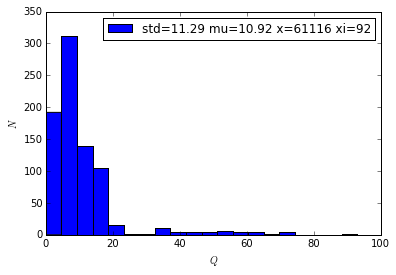

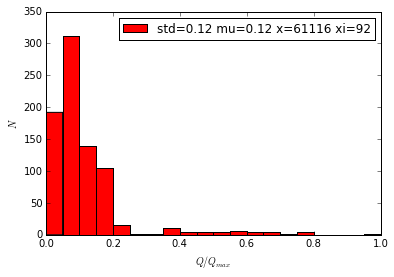

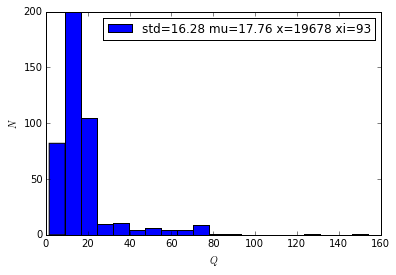

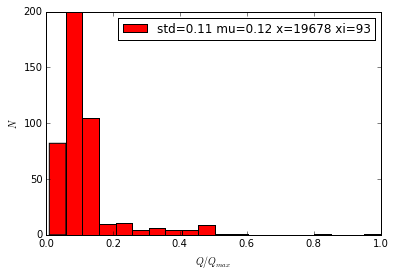

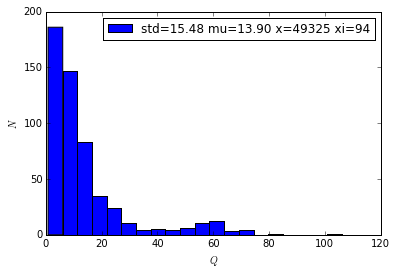

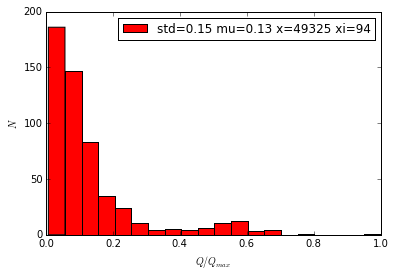

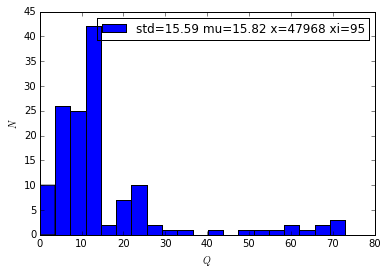

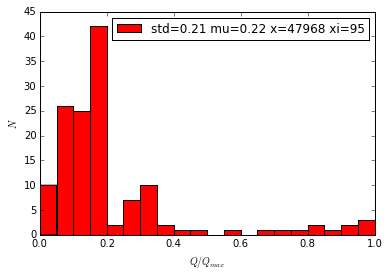

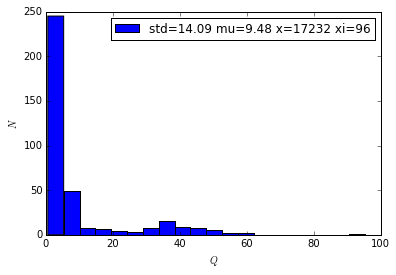

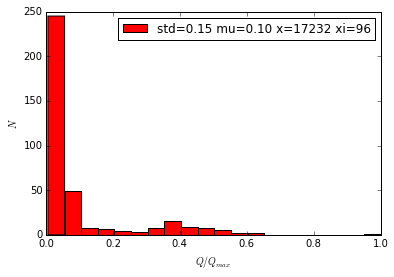

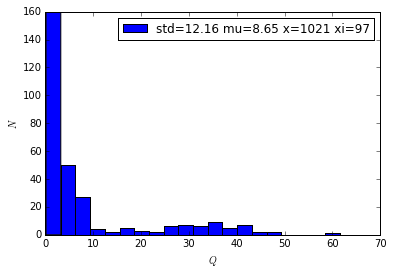

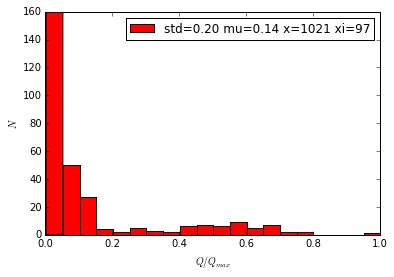

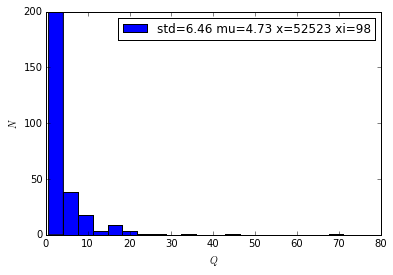

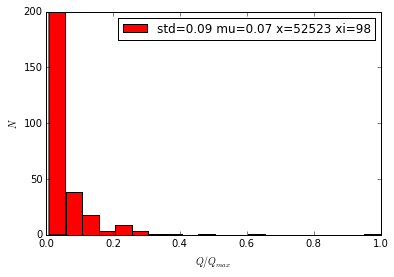

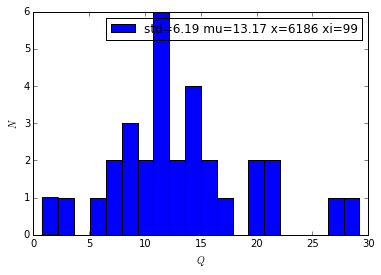

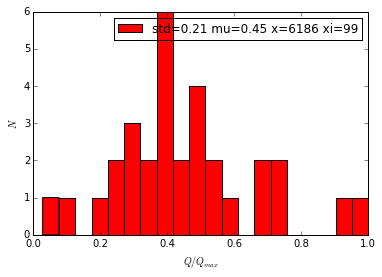

In [47]:
plot_hist('Q')

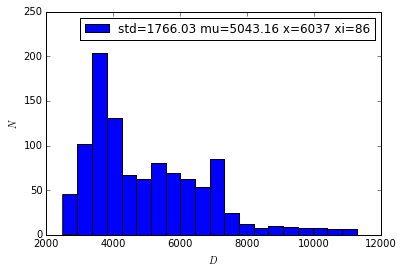

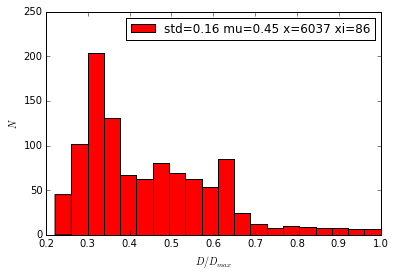

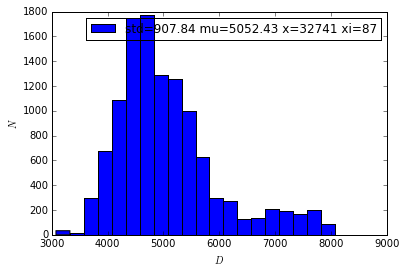

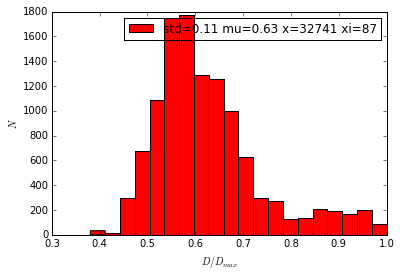

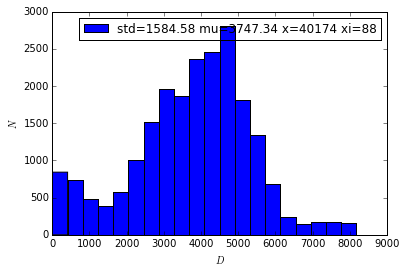

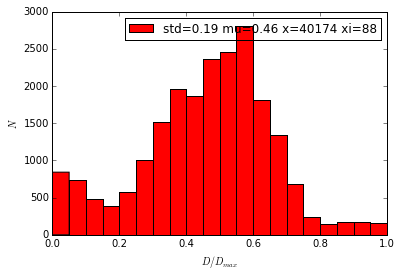

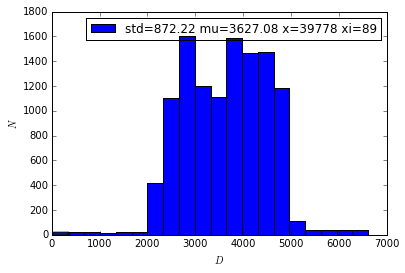

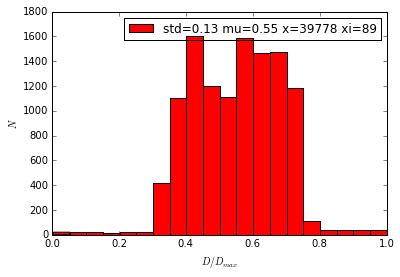

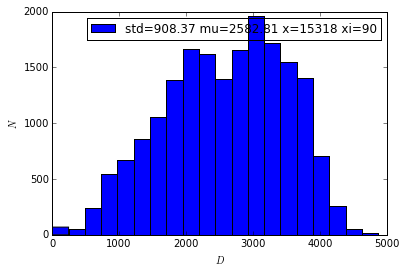

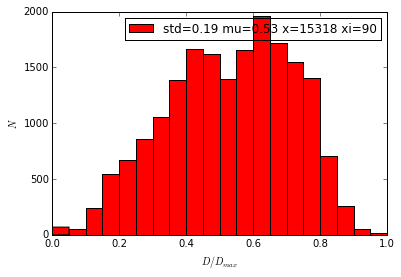

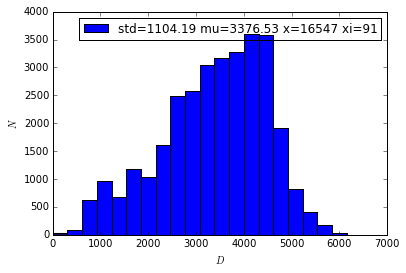

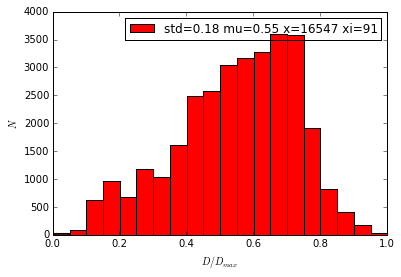

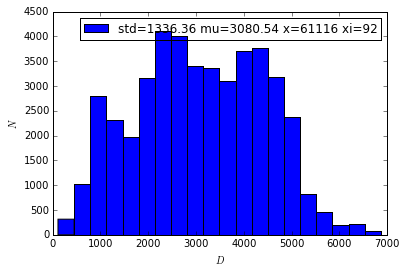

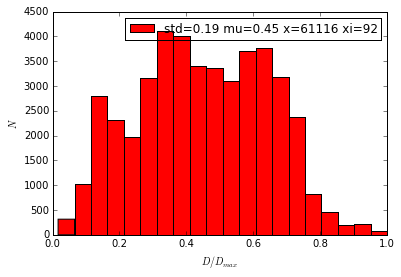

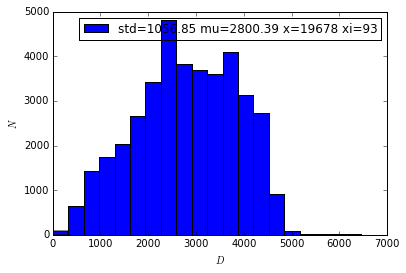

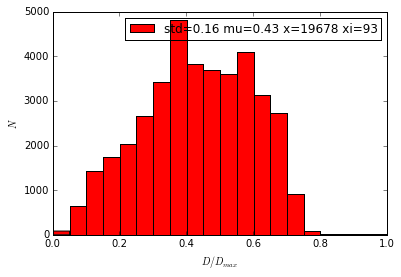

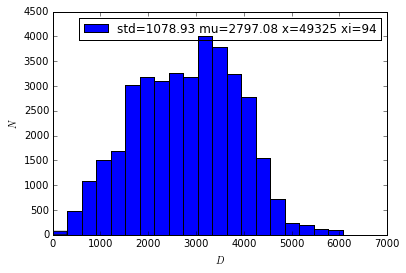

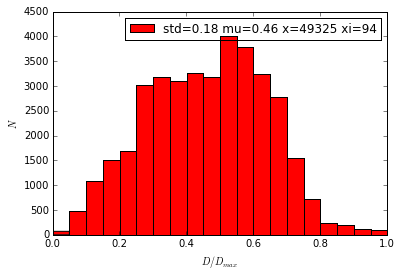

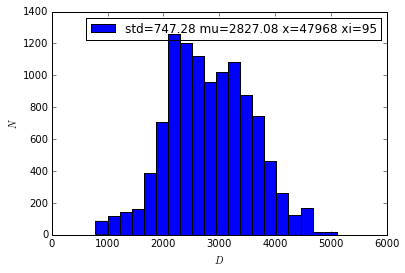

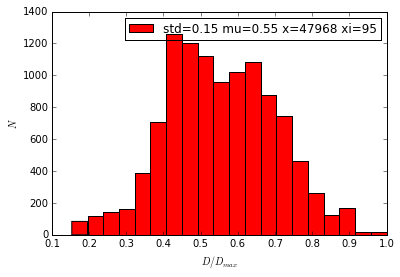

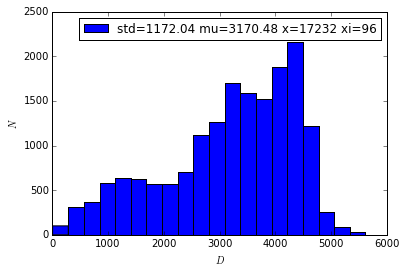

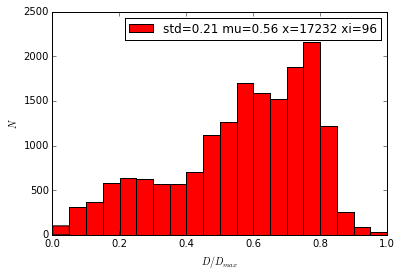

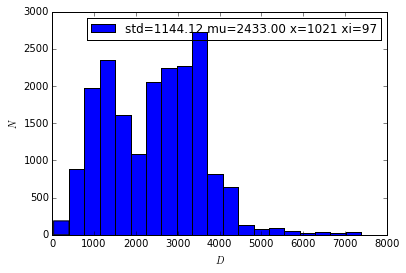

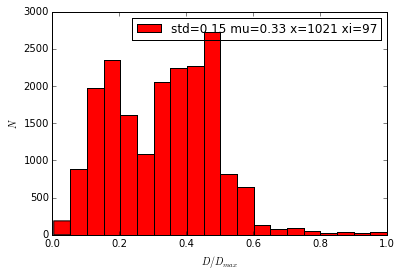

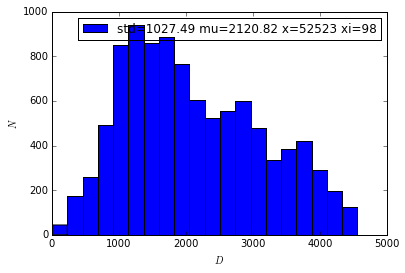

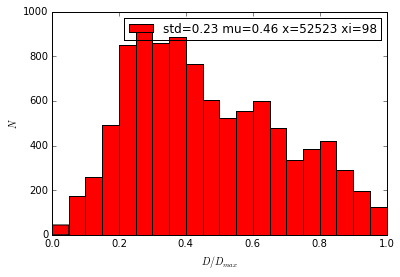

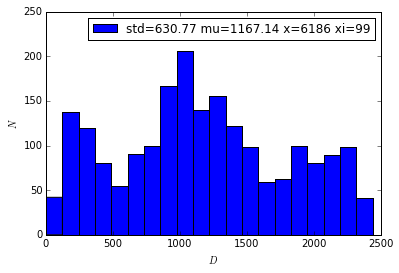

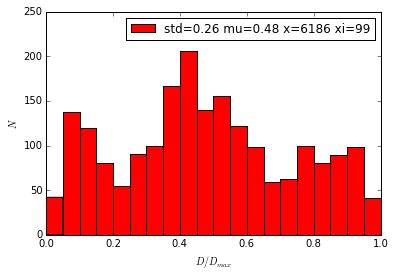

In [48]:
plot_hist('D')

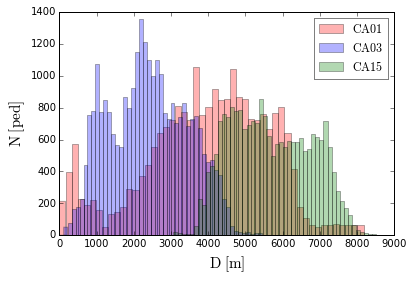

In [30]:
# Number of agents for a sample of catchement areas in Bristol

import random
sample = random.sample(zip(X['City of Bristol'],Xi['City of Bristol']),3)

sample = [40174,61116,32741]

label = {40174:'CA01',61116:'CA03',32741:'CA15'}
color = {40174:'r',61116:'b',32741:'g'}

d = loadCity('D','City of Bristol')

# for x,xi in sample:

for x in sample:
    try:
        plt.hist(d[x],bins=50,alpha=0.3,label='$\mathrm{{{0}}}$'.format(label[x]),facecolor=color[x])
    except KeyError:
        pass
    
fontsize=15    
    
#plt.title('$\mathrm{City \ of \ Bristol \ catchment \ areas \ (CA)}$',fontsize=fontsize)
plt.xlabel('$\mathrm{D \ [m]}$',fontsize=fontsize)
plt.ylabel('$\mathrm{N \ [ped]}$',fontsize=fontsize)
plt.legend(framealpha=0.5)
#plt.grid()

plt.savefig('../PhD/Papers/2014.12.untitled/figs/DvN.pdf')

In [12]:
average=np.mean(sample)
variance = 0
for i in sample:
    variance += (average - i) ** 2
    
print variance    

432985826.0


1669.41190525


(array([ 1602.,   702.,  1556.,  3411.,  4110.,  4523.,  3731.,  2810.,
          347.,   331.]),
 array([-2.37677859, -1.887196  , -1.3976134 , -0.90803081, -0.41844821,
         0.07113438,  0.56071697,  1.05029957,  1.53988216,  2.02946475,
         2.51904735]),
 <a list of 10 Patch objects>)

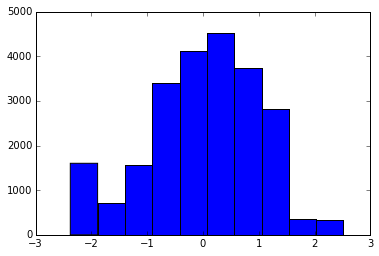

In [13]:
data = d[x]
data=data-np.mean(data)
print np.std(data)
data=data/np.std(data)
plt.hist(data)

In [14]:
np.mean([1,2,3])

2.0

1669.41190525


(array([ 1602.,   702.,  1556.,  3411.,  4110.,  4523.,  3731.,  2810.,
          347.,   331.]),
 array([-2.37677859, -1.887196  , -1.3976134 , -0.90803081, -0.41844821,
         0.07113438,  0.56071697,  1.05029957,  1.53988216,  2.02946475,
         2.51904735]),
 <a list of 10 Patch objects>)

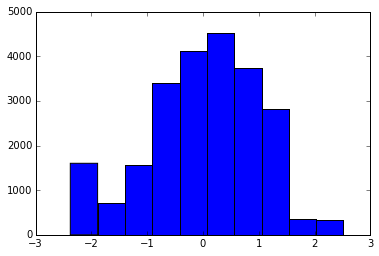

In [15]:
data = d[x]
print(np.std(data))
data=(data-np.mean(data))/np.std(data);
plt.hist(data)

In [16]:
data = d[x]
print(np.std(data))

1669.41190525


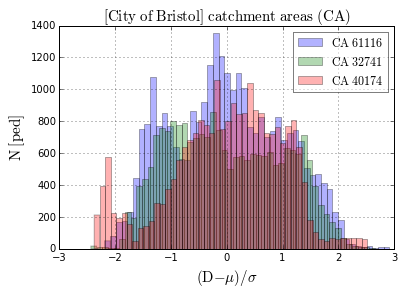

In [17]:
# Number of agents for a sample of catchement areas in Bristol

import random
sample = random.sample(zip(X['City of Bristol'],Xi['City of Bristol']),3)

sample = [61116,32741,40174]

d = loadCity('D','City of Bristol')

# for x,xi in sample:

for x in sample:
    try:
        sample = d[x]
        sample=sample-np.mean(sample);
        sample=sample/np.std(sample);
        plt.hist(sample,bins=50,alpha=0.3,label='$\mathrm{{CA \ {0}}}$'.format(str(x)))
    except KeyError:
        pass
    
fontsize=15
    
plt.title('$\mathrm{[City \ of \ Bristol] \ catchment \ areas \ (CA)}$',fontsize=fontsize)
plt.xlabel('$\mathrm{(D - \mu) / \sigma}$',fontsize=fontsize)
plt.ylabel('$\mathrm{N \ [ped]}$',fontsize=fontsize)
plt.legend(framealpha=0.5)

plt.grid()
plt.savefig('../PhD/Papers/2014.12.untitled/figs/DvN-norm.pdf')

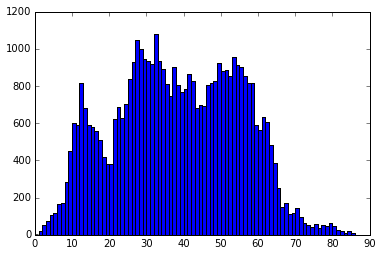

In [49]:
destin = 61116
data = np.array(loadCity('D','City of Bristol')[destin])/abm.fd.vFf/60
bins = np.ceil(max(data))
intermediate,edges,patches = plt.hist(data,bins=bins,range=[0,bins])

r=loadCity('_','City of Bristol')
w=loadCity('W','City of Bristol')
x=loadCity('X','City of Bristol')
xi = x.index(destin)

T90 = r['T90'][xi]
T90f = r['T90f'][xi]

d0 = intermediate/T90f/w[xi]
d1 = np.array(loadCity('Q','City of Bristol')[destin])/60

Qmax = abm.fd.kOpt*abm.fd.v_dict[abm.fd.kOpt]/60
Qmf = r['Qmf'][xi]/60
Qp = r['Qp'][xi]/60

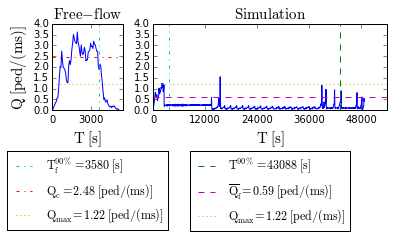

In [68]:
fig = plt.figure(figsize=(6,3))

from matplotlib import gridspec

gs = gridspec.GridSpec(1, 2,
                       width_ratios=[3,10],
                       )

fontsize = 15

ax0 = plt.subplot(gs[0])
ax0.set_xlabel('$\mathrm{T \ [s]}$',fontsize=fontsize)
ax0.set_ylabel('$\mathrm{Q \ [ped/(ms)]}$',fontsize=fontsize)
ax0.plot(d0)

ax0.axvline(T90f,linestyle='-.',color='c',label='$\mathrm{ T^{90\%%}_f = %0d \ [s] }$'%(T90f*60))
ax0.axhline(Qp,linestyle='-.',color='r',label='$\mathrm{ Q_c = %0.2f \ [ped/(ms)] }$'%Qp)
ax0.axhline(Qmax,linestyle=':',color='y',label='$\mathrm{ Q_{max} = %0.2f \ [ped/(ms)] }$'%Qmax)

xticks = range(0,len(d0),50)
xticklabs = np.array(xticks)*60
plt.xticks(xticks,xticklabs)

ax1 = plt.subplot(gs[1],sharey=ax0)
ax1.set_xlabel('$\mathrm{T \ [s]}$',fontsize=fontsize)
# ax1.set_ylabel('$\mathrm{Q \ [ped/(ms)]}$',fontsize=fontsize)
ax1.plot(d1)

ax1.axvline(T90,linestyle='--',color='g',label='$\mathrm{ T^{90\%%} = %0d \ [s] }$'%(T90*60))
ax1.axvline(T90f,linestyle='-.',color='c')
ax1.axhline(Qmf,linestyle='--',color='m',label='$\mathrm{ \overline{Q}_{f} = %0.2f \ [ped/(ms)] }$'%Qmf)
ax1.axhline(Qmax,linestyle=':',color='y',label='$\mathrm{ Q_{max} = %0.2f \ [ped/(ms)] }$'%Qmax)

xticks = range(0,len(d1),200)
xticklabs = np.array(xticks)*60
plt.xticks(xticks,xticklabs)

handles, labels = ax0.get_legend_handles_labels()
lgd = ax0.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,-0.4))

handles, labels = ax1.get_legend_handles_labels()
lgd = ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5,-0.4))


ax0.set_title('$\mathrm{Free-flow}$',fontsize=fontsize)
ax1.set_title('$\mathrm{Simulation}$',fontsize=fontsize)


# ax1.set_title('$\mathrm{[City \ of \ Bristol]}$',fontsize=fontsize)
# ax0.set_title('$\mathrm{CA \ %0d}$'%destin,fontsize=fontsize)

plt.gcf().subplots_adjust(bottom=0.5)   

plt.savefig('../PhD/Papers/2014.12.untitled/figs/single-T-Q.pdf')

In [66]:
len(d1)

813